In [100]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [101]:
# Load dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [102]:
# Convert to tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [103]:
# Model setup
n_samples, n_features = X.shape
input_size = n_features      # ✅ Corrected here
output_size = 1
model = nn.Linear(input_size, output_size)

In [104]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 4483.8481
Epoch [20/100], Loss: 3342.0659
Epoch [30/100], Loss: 2516.3372
Epoch [40/100], Loss: 1918.5178
Epoch [50/100], Loss: 1485.2590
Epoch [60/100], Loss: 1170.9653
Epoch [70/100], Loss: 942.7724
Epoch [80/100], Loss: 776.9587
Epoch [90/100], Loss: 656.3829
Epoch [100/100], Loss: 568.6432


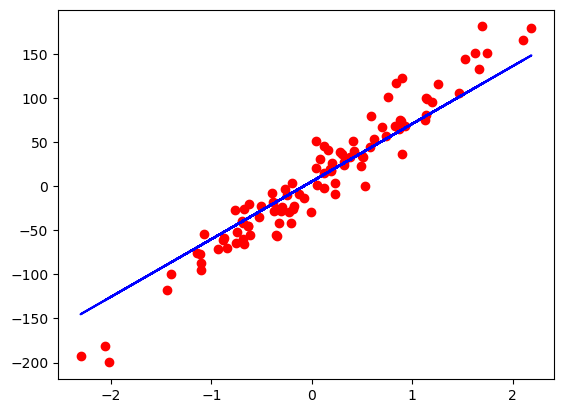

In [105]:
# Plot results
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')       # original data
plt.plot(X_numpy, predicted, 'b')      # model prediction
plt.show()